In [1]:
import os
import glob
import json
import pandas as pd
import numpy as np

from itertools import groupby
from collections import Counter
from os.path import exists

In [2]:
def IssuerCode(state=False):
    issuers = pd.read_csv('data/list_of_issuer-20230322.csv',sep=';')
    issuer_filtered = []
    for code_stock in issuers.Code:
        # Check last transaction 2023
        # Have 200 transaction
        path = f'data/history/{code_stock}.csv'
        if os.path.exists(path):
            historical = pd.read_csv(path)
            last_date_row = historical.Date.iloc[len(historical)-1] # get last date transactions
            data_test = historical[len(historical)-(int(len(historical)*0.2)):]['Close'] # get data test
            var = np.var(data_test) # calculate variance from data test
           
            if (last_date_row[:4] == '2023' and len(historical) >= 200 and var > 0):
                print(code_stock)
                issuer_filtered.append(code_stock)
    
    if state:
        print("Code of Stock Issuer: {}".format(issuer_filtered))
    else:
        return issuer_filtered

In [3]:
issuers = IssuerCode()


ASHA
OLIV
IBOS
MTMH
TLDN
GOTO
SICO
WIRG
BIKE
NANO
STAA
SMKM
NTBK
ENAK
NETV
ASLC
SEMA
ADMR
DRMA
BSML
NASI
IPPE
AVIA
OBMD
RMKE
CMRY
TAYS
WGSH
WMPP
BINO
DEPO
MTEL
BOBA
KUAS
IDEA
CMNT
GTSI
RSGK
RUNS
SBMA
MCOL
GPSO
OILS
HAIS
BUKA
UVCR
NICL
BMHS
IPAC
MASB
ARCI
LABA
TRUE
MGLV
HOPE
ADCP
LUCY
NPGF
TAPG
FIMP
LFLO
ZYRX
SNLK
BEBS
UNIQ
EDGE
WMUU
BANK
UFOE
DGNS
DCII
FAPA
WIFI
PMMP
VICI
ATAP
PTDU
PLAN
ENZO
HOMI
ROCK
PURI
SOHO
BBSI
KMDS
SCNP
PNGO
TRJA
SGER
TOYS
PPGL
PGUN
SOFA
UANG
TECH
CASH
BBSS
BHAT
CBMF
KBAG
SAMF
AMAN
CARE
BESS
ESTA
ASPI
AYLS
IKAN
TAMA
PTPW
PURA
DMND
TRIN
AMOR
INDO
AMAR
CSRA
PGJO
GLVA
UCID
PMJS
IFII
IFSH
AGAR
KEJU
PSGO
TEBE
ESIP
SINI
DMMX
IRRA
PURE
SLIS
NZIA
OPMS
GGRP
TFAS
KEEN
HDIT
SMKL
ARKA
INOV
EAST
FUJI
LIFE
BLUE
IPTV
PAMG
ITIC
KAYU
KJEN
POLU
SFAN
CCSI
BOLA
FITT
JAST
HRME
MTPS
COCO
JAYA
CLAY
NATO
BEEF
POLI
FOOD
PEHA
ZONE
SOTS
URBN
LUCK
DIVA
POLA
SOSS
SATU
CAKK
YELO
SKRN
GOOD
MPRO
SURE
SAPX
CITY
DIGI
PANI
MOLI
LAND
FILM
MGRO
NFCX
POLL
BPTR
IPCC
RISE
TCPI
MAPA
TNCA
MSIN
SWAT
TUGU


In [4]:
# read profile stock
def_sectors = ['Barang Baku','Barang Konsumen Non-Primer','Barang Konsumen Primer','Energi','Keuangan','Kesehatan','Perindustrian','Infrastruktur','Properti','Teknologi','Transportasi',]

undefined_sectors = ['PROPERTY, REAL ESTATE AND BUILDING CONSTRUCTION', 
                     'Transportasi & Logistik', 
                     'Financials', 
                     'MISCELLANEOUS INDUSTRY', 
                     'Consumer Cyclicals', 
                     'Properties & Real Estate', 
                     'INFRASTRUCTURE, UTILITIES  AND TRANSPORTATION', 
                     'BASIC INDUSTRY AND CHEMICALS', 
                     'TRADE, SERVICES & INVESTMENT', 
                     'CONSUMER GOODS INDUSTRY', 
                     'Properti & Real Estat']

path_profile = 'data/profile/'
path_transaction = 'data/history/'

issuer_sectors = {'code':[],'sector':[],'len':[]}

for issuer in issuers:
    filename = f'{path_profile}/{issuer}.json'
    p = open(filename, encoding='cp1252')
    profiles = json.load(p)
    
    path = f'{path_transaction}{issuer}.csv'
    if exists(path):
        historical = pd.read_csv(path)
    
    if issuer in ['BOLT','RICY','INDS']:
        profiles['Profiles'][0]['Sektor'] = 'Barang Konsumen Non-Primer'
    elif issuer == 'IKBI':
        profiles['Profiles'][0]['Sektor'] = 'Perindustrian'    
    elif issuer == 'RIMO':
        profiles['Profiles'][0]['Sektor'] = 'Properti'
    elif profiles['Profiles'][0]['Sektor'] in undefined_sectors[:2]:
        profiles['Profiles'][0]['Sektor'] = 'Transportasi'
    elif profiles['Profiles'][0]['Sektor'] in undefined_sectors[2]:
        profiles['Profiles'][0]['Sektor'] = 'Keuangan'
    elif profiles['Profiles'][0]['Sektor'] in undefined_sectors[4]:
        profiles['Profiles'][0]['Sektor'] = 'Barang Konsumen Non-Primer'
    elif profiles['Profiles'][0]['Sektor'] in undefined_sectors[5]:
        profiles['Profiles'][0]['Sektor'] = 'Properti'
    elif profiles['Profiles'][0]['Sektor'] in undefined_sectors[6]:
        profiles['Profiles'][0]['Sektor'] = 'Transportasi'
    elif profiles['Profiles'][0]['Sektor'] in undefined_sectors[7]:
        profiles['Profiles'][0]['Sektor'] = 'Barang Baku'
    elif profiles['Profiles'][0]['Sektor'] in undefined_sectors[9]:
        profiles['Profiles'][0]['Sektor'] = 'Barang Konsumen Non-Primer'
    elif profiles['Profiles'][0]['Sektor'] in undefined_sectors[10]:
        profiles['Profiles'][0]['Sektor'] = 'Properti'
    
    if profiles['Profiles'][0]['Sektor'] not in undefined_sectors:
        issuer_sectors['code'].append(issuer)
        issuer_sectors['sector'].append(profiles['Profiles'][0]['Sektor'])
        issuer_sectors['len'].append(len(historical))
    else:
        print(profiles['Profiles'][0]['Sektor'])

sectors = sorted(list(set(issuer_sectors['sector'])))
print(sectors)
print(len(issuer_sectors['code']))

['Barang Baku', 'Barang Konsumen Non-Primer', 'Barang Konsumen Primer', 'Energi', 'Infrastruktur', 'Kesehatan', 'Keuangan', 'Perindustrian', 'Properti', 'Teknologi', 'Transportasi']
489


In [5]:
# Sort the data by the 'sector' key
sorted_data = sorted(zip(issuer_sectors['sector'], issuer_sectors['code']))

# Group the data by the 'sector' key
grouped_data = groupby(sorted_data, key=lambda x: x[0])

# Create a new dictionary to store the grouped data
grouped_sectors = {}

# Iterate over the grouped data and store it in the new dictionary
for sector, group in grouped_data:
    codes = [item[1] for item in group]
    grouped_sectors[sector] = codes

print(grouped_sectors)

{'Barang Baku': ['AGII', 'ALDO', 'ARCI', 'AVIA', 'AYLS', 'BAJA', 'BEBS', 'BRMS', 'CITA', 'CLPI', 'CMNT', 'ESIP', 'ESSA', 'FPNI', 'GDST', 'GGRP', 'IFII', 'IFSH', 'INCF', 'IPOL', 'ISSP', 'KAYU', 'KMTR', 'KRAS', 'MDKA', 'MDKI', 'MOLI', 'NICL', 'NIKL', 'NPGF', 'OBMD', 'OKAS', 'OPMS', 'PBID', 'PNGO', 'PSAB', 'PURE', 'SAMF', 'SBMA', 'SMBR', 'SMKL', 'SQMI', 'SWAT', 'TALF', 'TPIA', 'WSBP', 'WTON', 'YPAS', 'ZINC'], 'Barang Konsumen Non-Primer': ['ABBA', 'ACES', 'AKKU', 'ARTA', 'ASLC', 'BELL', 'BIKE', 'BLTZ', 'BOGA', 'BOLA', 'BOLT', 'BUVA', 'CARS', 'CBMF', 'CINT', 'CLAY', 'CSAP', 'DEPO', 'DFAM', 'DIGI', 'DRMA', 'EAST', 'ECII', 'ENAK', 'ERAA', 'ESTA', 'FILM', 'FITT', 'FORU', 'GEMA', 'GLOB', 'HRME', 'HRTA', 'IDEA', 'IIKP', 'INOV', 'IPTV', 'LFLO', 'LUCY', 'MAPA', 'MAPB', 'MAPI', 'MARI', 'MASA', 'MDIA', 'MGLV', 'MICE', 'MINA', 'MNCN', 'MPMX', 'MSIN', 'MSKY', 'NASA', 'NATO', 'NETV', 'OLIV', 'PDES', 'PJAA', 'PLAN', 'PMJS', 'POLU', 'PZZA', 'SCMA', 'SCNP', 'SLIS', 'SNLK', 'SOFA', 'SOTS', 'SRIL', 'TELE',

In [6]:
sector_counts = Counter(issuer_sectors['sector'])
print(sector_counts)

Counter({'Barang Konsumen Non-Primer': 79, 'Keuangan': 68, 'Barang Konsumen Primer': 63, 'Energi': 53, 'Barang Baku': 49, 'Infrastruktur': 45, 'Properti': 43, 'Teknologi': 28, 'Perindustrian': 25, 'Transportasi': 20, 'Kesehatan': 16})


In [7]:
sum_by_sector = {}
sector_counter = Counter()

for code, sector, length in zip(issuer_sectors['code'], issuer_sectors['sector'], issuer_sectors['len']):
    if sector not in sum_by_sector:
        sum_by_sector[sector] = 0
    sum_by_sector[sector] += length
    sector_counter[sector] += 1

print(dict(sorted(sum_by_sector.items())))
print(dict(sorted(sector_counter.items())))


{'Barang Baku': 101803, 'Barang Konsumen Non-Primer': 149994, 'Barang Konsumen Primer': 107450, 'Energi': 128393, 'Infrastruktur': 98542, 'Kesehatan': 20998, 'Keuangan': 188143, 'Perindustrian': 41841, 'Properti': 77166, 'Teknologi': 37622, 'Transportasi': 35945}
{'Barang Baku': 49, 'Barang Konsumen Non-Primer': 79, 'Barang Konsumen Primer': 63, 'Energi': 53, 'Infrastruktur': 45, 'Kesehatan': 16, 'Keuangan': 68, 'Perindustrian': 25, 'Properti': 43, 'Teknologi': 28, 'Transportasi': 20}


In [8]:
issuer_result = {'code':[],'sector':[],'lookback':[],'arch':[],'r2':[],'mse':[],'rmse':[],'mape':[],'acc':[],'f1':[]}

lookbacks = [5,15]
architecture = ['TFCNN','TFCNNGRU','TFCNNLSTM','TFGRU','TFGRUCNN','TFGRULSTM','TFLSTM','TFLSTMCNN','TFLSTMGRU','TFGCNGRU','TFGCNLSTM', 'TFTFR']

path_result = 'results/evaluations/'

for code, sector in zip(issuer_sectors['code'], issuer_sectors['sector']):
    for archi in architecture:
        for lookback in lookbacks:
            if 'GCN' in archi:
                path_score = f'{path_result}{archi}_multivariate_graph/{code}_{lookback}_test_score.json'
                path_class = f'{path_result}{archi}_multivariate_graph/{code}_{lookback}_test_classification.json'
            else:
                path_score = f'{path_result}{archi}_multivariate/{code}_{lookback}_test_score.json'
                path_class = f'{path_result}{archi}_multivariate/{code}_{lookback}_test_classification.json'
            
            score_json = json.load(open(path_score))
            class_json = json.load(open(path_class))
            
            issuer_result['code'].append(code)
            issuer_result['sector'].append(sector)
            issuer_result['lookback'].append(lookback)
            issuer_result['arch'].append(archi)
            issuer_result['r2'].append(score_json['R2'])
            issuer_result['mse'].append(score_json['MSE'])
            issuer_result['rmse'].append(score_json['RMSE'])
            issuer_result['mape'].append(score_json['MAPE'])
            issuer_result['acc'].append(class_json['accuracy'])
            issuer_result['f1'].append(class_json['macro avg']['f1-score'] if 'macro avg' in class_json else 0)
            

In [9]:
df_result = pd.DataFrame(issuer_result)
df_averages = df_result.groupby(['code', 'sector', 'arch'], as_index=False).mean()[['code', 'sector', 'arch', 'r2', 'mse', 'rmse', 'mape', 'acc', 'f1']]

best_arch_r2 = df_averages.loc[df_averages.groupby(['code', 'sector'])['r2'].idxmax()]
best_arch_mse = df_averages.loc[df_averages.groupby(['code', 'sector'])['mse'].idxmin()]
best_arch_rmse = df_averages.loc[df_averages.groupby(['code', 'sector'])['rmse'].idxmin()]
best_arch_mape = df_averages.loc[df_averages.groupby(['code', 'sector'])['mape'].idxmin()]
best_arch_f1 = df_averages.loc[df_averages.groupby(['code', 'sector'])['f1'].idxmax()]

df_best = pd.concat([best_arch_r2, best_arch_mse, best_arch_rmse, best_arch_mape, best_arch_f1])

df_best_arch = df_best.groupby(['code', 'sector', 'arch'], as_index=False).count()[['code', 'sector', 'arch', 'r2']]
best_arch = df_best_arch.loc[df_best_arch.groupby(['code', 'sector'])['r2'].idxmax()]
best_arch = best_arch.rename(columns={'r2': 'count'})
best_arch_count = best_arch.groupby(['arch'], as_index=False).count()[['arch','count']]
print(best_arch_count)

         arch  count
0       TFCNN     44
1    TFCNNGRU      2
2   TFCNNLSTM      2
3    TFGCNGRU      3
4   TFGCNLSTM      9
5       TFGRU    170
6    TFGRUCNN      5
7   TFGRULSTM     86
8      TFLSTM     43
9   TFLSTMCNN      8
10  TFLSTMGRU     73
11      TFTFR     44


         arch  count
1    TFCNNGRU      2
2   TFCNNLSTM      2
3    TFGCNGRU      3
6    TFGRUCNN      5
9   TFLSTMCNN      8
4   TFGCNLSTM      9
8      TFLSTM     43
0       TFCNN     44
11      TFTFR     44
10  TFLSTMGRU     73
7   TFGRULSTM     86
5       TFGRU    170


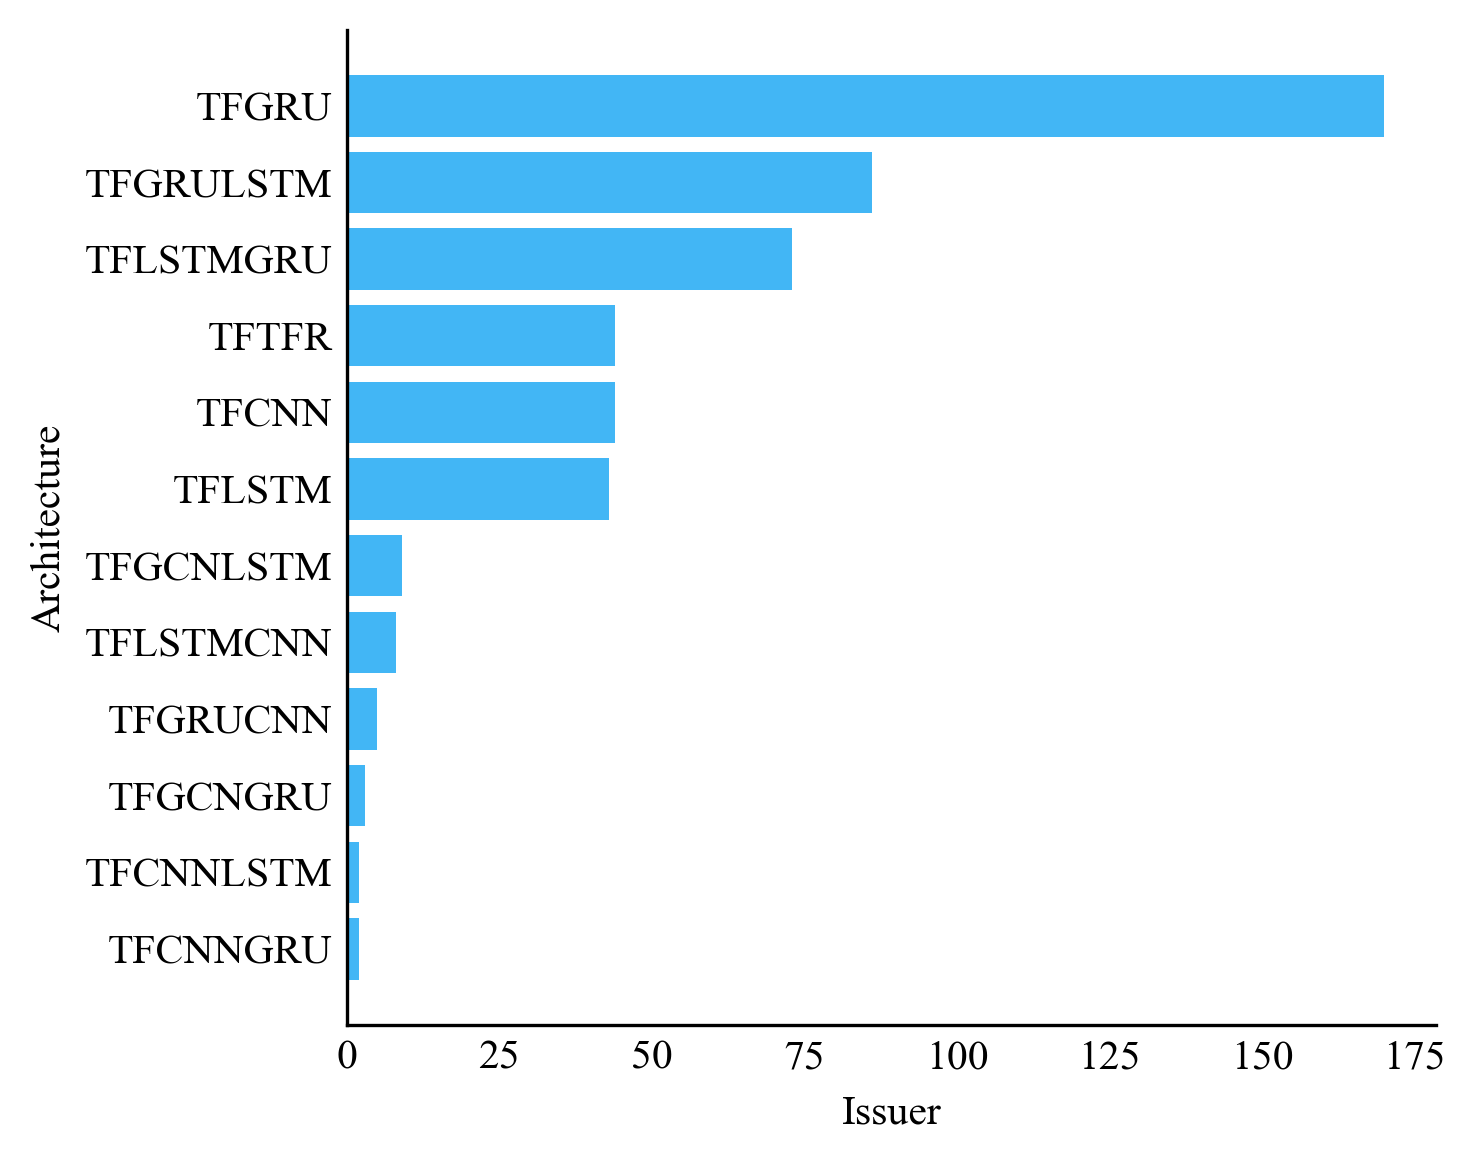

In [10]:
import matplotlib.pyplot as plt
plt.rcdefaults()
plt.rcParams.update({'font.family':'Times New Roman'})
fig = plt.figure(figsize =(5, 4))

# bar_colors = ['#4287f5', '#42f5a3', '#f54242', '#f5d142', '#a342f5', '#f57f42', '#42b6f5', '#f542c6', '#42f5e9', '#c6f542', '#f5bc42']
df = best_arch_count.sort_values('count', ascending=True)
print(df)
plt.barh(df['arch'], df['count'], color='#42b6f5')
plt.xlabel('Issuer')
plt.ylabel('Architecture')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tick_params(axis='both', which='both', length=0, labelsize=10)
plt.tight_layout()

fig.set_dpi(300.0)
plt.show()

In [11]:
df_averages = df_result.groupby(['code', 'sector', 'arch'], as_index=False).mean()[['code', 'sector', 'arch', 'r2', 'mse', 'rmse', 'mape', 'acc', 'f1']]

best_arch_r2 = df_averages.loc[df_averages.groupby(['code', 'sector'])['r2'].idxmax()]
best_arch_mse = df_averages.loc[df_averages.groupby(['code', 'sector'])['mse'].idxmin()]
best_arch_rmse = df_averages.loc[df_averages.groupby(['code', 'sector'])['rmse'].idxmin()]
best_arch_mape = df_averages.loc[df_averages.groupby(['code', 'sector'])['mape'].idxmin()]
best_arch_f1 = df_averages.loc[df_averages.groupby(['code', 'sector'])['f1'].idxmax()]

df_best = pd.concat([best_arch_r2, best_arch_mse, best_arch_rmse, best_arch_mape, best_arch_f1])

df_best_arch = df_best.groupby(['code', 'sector', 'arch'], as_index=False).count()[['code', 'sector', 'arch', 'r2']]
best_arch = df_best_arch.loc[df_best_arch.groupby(['code', 'sector'])['r2'].idxmax()]
best_arch = best_arch.rename(columns={'r2': 'count'})
best_arch_count = best_arch.groupby(['arch'], as_index=False).count()[['arch','count']]

In [12]:
df_result = pd.DataFrame(issuer_result)
df_averages_score = df_result.groupby(['arch'], as_index=False)[['r2', 'mse', 'rmse', 'mape', 'acc', 'f1']].mean()
print(df_averages_score)
df_averages_score.to_excel('df_averages_score.xlsx', index=False)

         arch           r2           mse        rmse      mape       acc  \
0       TFCNN  -122.121390  1.541039e+05  118.192779  0.150206  0.484141   
1    TFCNNGRU  -109.991538  8.815051e+05  188.805515  0.164609  0.510034   
2   TFCNNLSTM   -65.500418  1.020739e+06  199.690174  0.150401  0.504224   
3    TFGCNGRU   -74.756115  1.726645e+06  265.878911  0.167174  0.503114   
4   TFGCNLSTM   -33.963919  1.641998e+06  271.666411  0.172409  0.505508   
5       TFGRU   -39.426640  5.770210e+05  142.493339  0.085669  0.518305   
6    TFGRUCNN   -69.558903  5.935645e+05  159.563092  0.126963  0.496800   
7   TFGRULSTM   -64.930324  8.012565e+05  160.451339  0.090584  0.514721   
8      TFLSTM   -59.314644  7.626276e+05  153.928922  0.100326  0.517116   
9   TFLSTMCNN   -86.166082  7.673181e+05  168.732846  0.125584  0.488119   
10  TFLSTMGRU   -90.767576  7.731643e+05  158.065010  0.096678  0.523426   
11      TFTFR -1585.140742  2.800556e+06  276.144750  0.405793  0.470011   

          f

         arch           r2           mse        rmse      mape       acc  \
11      TFTFR -1585.140742  2.800556e+06  276.144750  0.405793  0.470011   
3    TFGCNGRU   -74.756115  1.726645e+06  265.878911  0.167174  0.503114   
4   TFGCNLSTM   -33.963919  1.641998e+06  271.666411  0.172409  0.505508   
2   TFCNNLSTM   -65.500418  1.020739e+06  199.690174  0.150401  0.504224   
1    TFCNNGRU  -109.991538  8.815051e+05  188.805515  0.164609  0.510034   
7   TFGRULSTM   -64.930324  8.012565e+05  160.451339  0.090584  0.514721   
10  TFLSTMGRU   -90.767576  7.731643e+05  158.065010  0.096678  0.523426   
9   TFLSTMCNN   -86.166082  7.673181e+05  168.732846  0.125584  0.488119   
8      TFLSTM   -59.314644  7.626276e+05  153.928922  0.100326  0.517116   
6    TFGRUCNN   -69.558903  5.935645e+05  159.563092  0.126963  0.496800   
5       TFGRU   -39.426640  5.770210e+05  142.493339  0.085669  0.518305   
0       TFCNN  -122.121390  1.541039e+05  118.192779  0.150206  0.484141   

          f

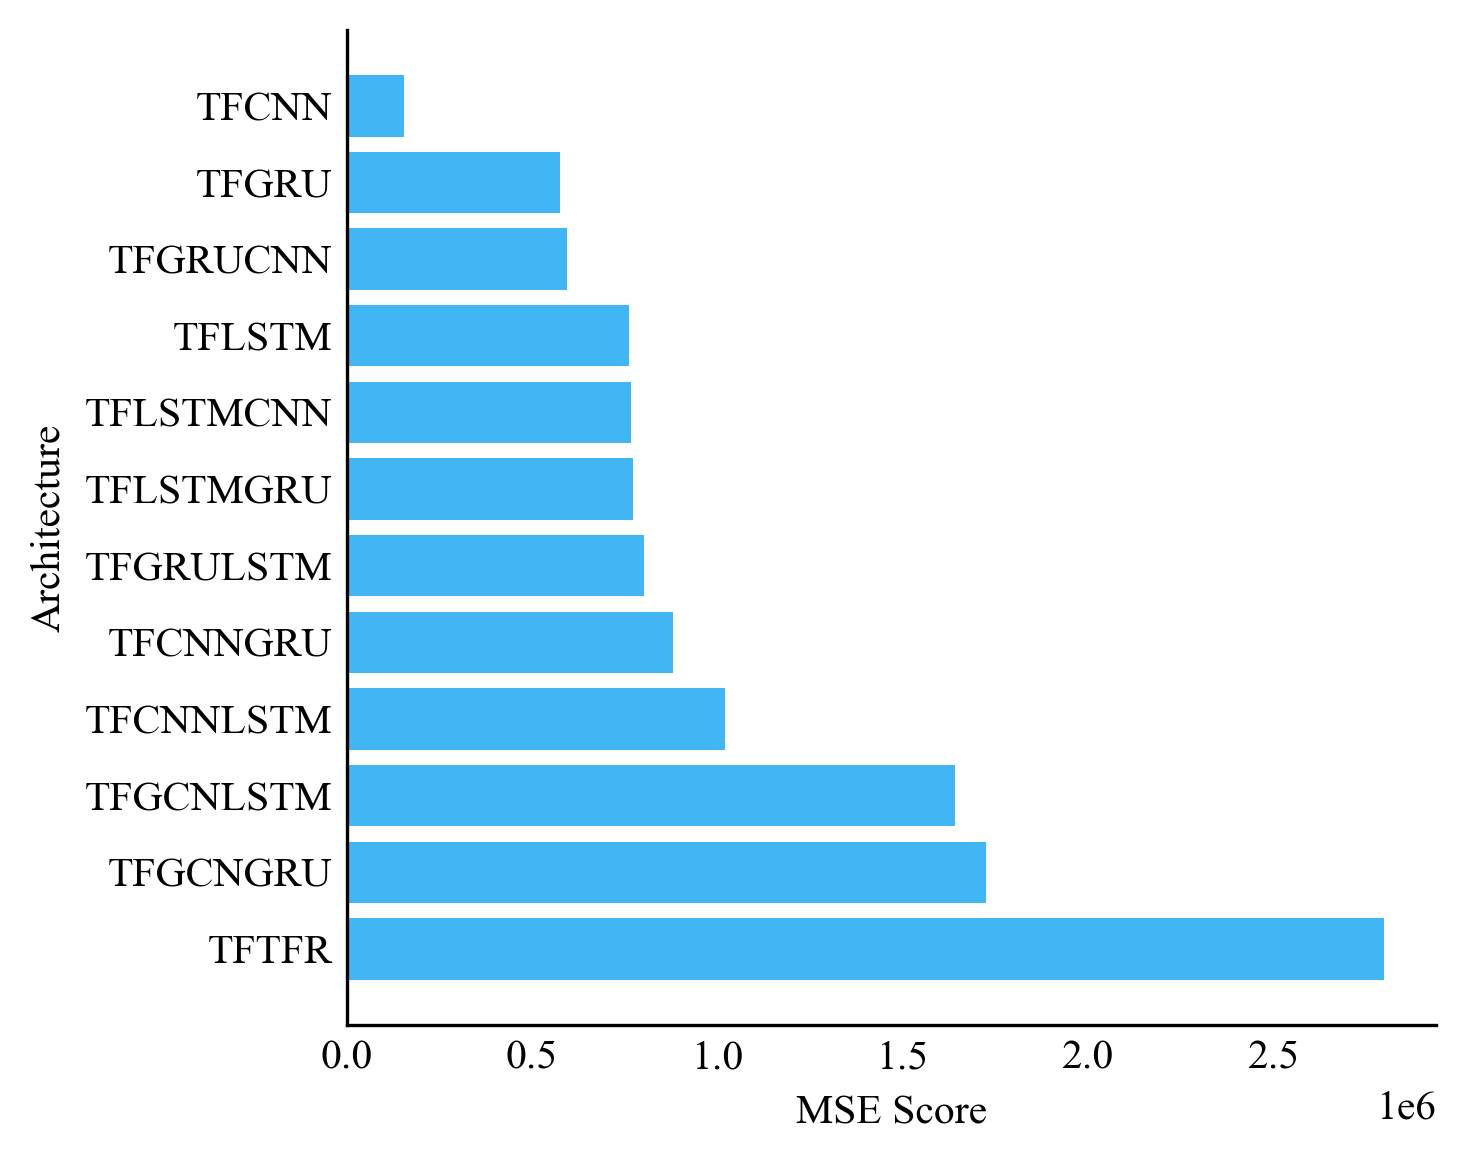

In [13]:
import matplotlib.pyplot as plt
plt.rcdefaults()
plt.rcParams.update({'font.family':'Times New Roman'})
fig = plt.figure(figsize =(5, 4))

df = df_averages_score.sort_values('mse', ascending=False)
print(df)
plt.barh(df['arch'], df['mse'], color='#42b6f5')
plt.xlabel('MSE Score')
plt.ylabel('Architecture')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tick_params(axis='both', which='both', length=0, labelsize=10)
plt.tight_layout()

fig.set_dpi(300.0)
plt.show()

         arch           r2           mse        rmse      mape       acc  \
11      TFTFR -1585.140742  2.800556e+06  276.144750  0.405793  0.470011   
4   TFGCNLSTM   -33.963919  1.641998e+06  271.666411  0.172409  0.505508   
3    TFGCNGRU   -74.756115  1.726645e+06  265.878911  0.167174  0.503114   
2   TFCNNLSTM   -65.500418  1.020739e+06  199.690174  0.150401  0.504224   
1    TFCNNGRU  -109.991538  8.815051e+05  188.805515  0.164609  0.510034   
9   TFLSTMCNN   -86.166082  7.673181e+05  168.732846  0.125584  0.488119   
7   TFGRULSTM   -64.930324  8.012565e+05  160.451339  0.090584  0.514721   
6    TFGRUCNN   -69.558903  5.935645e+05  159.563092  0.126963  0.496800   
10  TFLSTMGRU   -90.767576  7.731643e+05  158.065010  0.096678  0.523426   
8      TFLSTM   -59.314644  7.626276e+05  153.928922  0.100326  0.517116   
5       TFGRU   -39.426640  5.770210e+05  142.493339  0.085669  0.518305   
0       TFCNN  -122.121390  1.541039e+05  118.192779  0.150206  0.484141   

          f

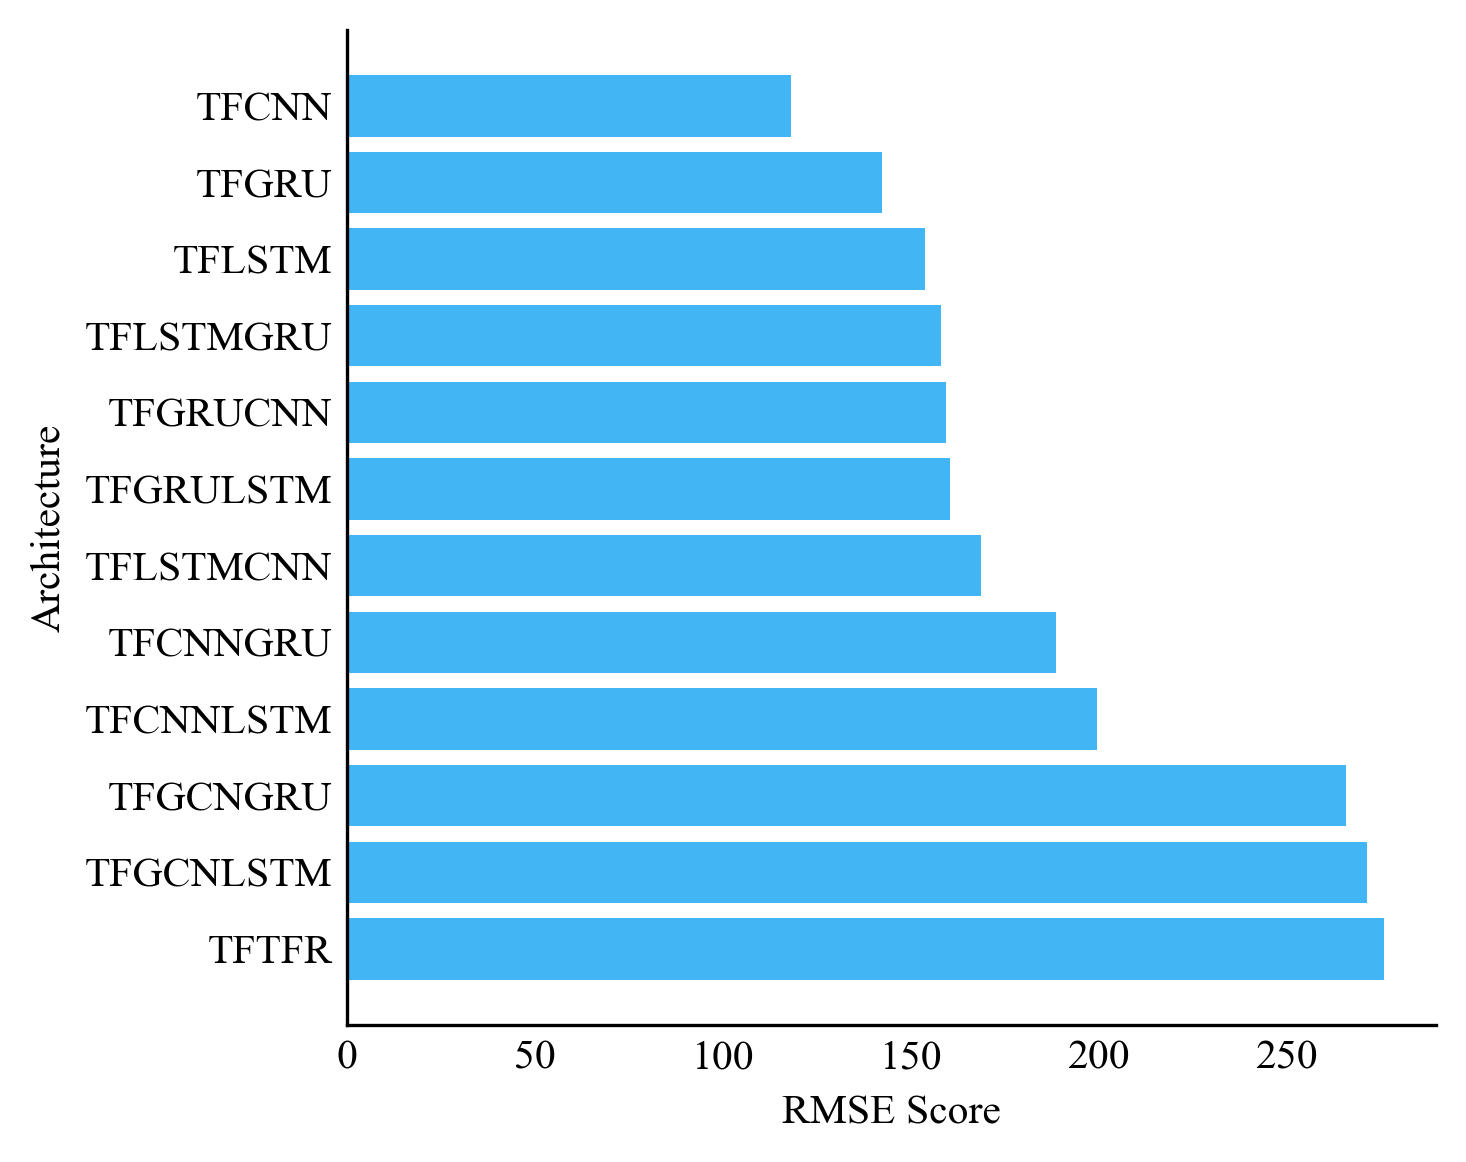

In [14]:
import matplotlib.pyplot as plt
plt.rcdefaults()
plt.rcParams.update({'font.family':'Times New Roman'})
fig = plt.figure(figsize =(5, 4))

df = df_averages_score.sort_values('rmse', ascending=False)
print(df)
plt.barh(df['arch'], df['rmse'], color='#42b6f5')
plt.xlabel('RMSE Score')
plt.ylabel('Architecture')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tick_params(axis='both', which='both', length=0, labelsize=10)
plt.tight_layout()

fig.set_dpi(300.0)
plt.show()

         arch           r2           mse        rmse      mape       acc  \
11      TFTFR -1585.140742  2.800556e+06  276.144750  0.405793  0.470011   
4   TFGCNLSTM   -33.963919  1.641998e+06  271.666411  0.172409  0.505508   
3    TFGCNGRU   -74.756115  1.726645e+06  265.878911  0.167174  0.503114   
1    TFCNNGRU  -109.991538  8.815051e+05  188.805515  0.164609  0.510034   
2   TFCNNLSTM   -65.500418  1.020739e+06  199.690174  0.150401  0.504224   
0       TFCNN  -122.121390  1.541039e+05  118.192779  0.150206  0.484141   
6    TFGRUCNN   -69.558903  5.935645e+05  159.563092  0.126963  0.496800   
9   TFLSTMCNN   -86.166082  7.673181e+05  168.732846  0.125584  0.488119   
8      TFLSTM   -59.314644  7.626276e+05  153.928922  0.100326  0.517116   
10  TFLSTMGRU   -90.767576  7.731643e+05  158.065010  0.096678  0.523426   
7   TFGRULSTM   -64.930324  8.012565e+05  160.451339  0.090584  0.514721   
5       TFGRU   -39.426640  5.770210e+05  142.493339  0.085669  0.518305   

          f

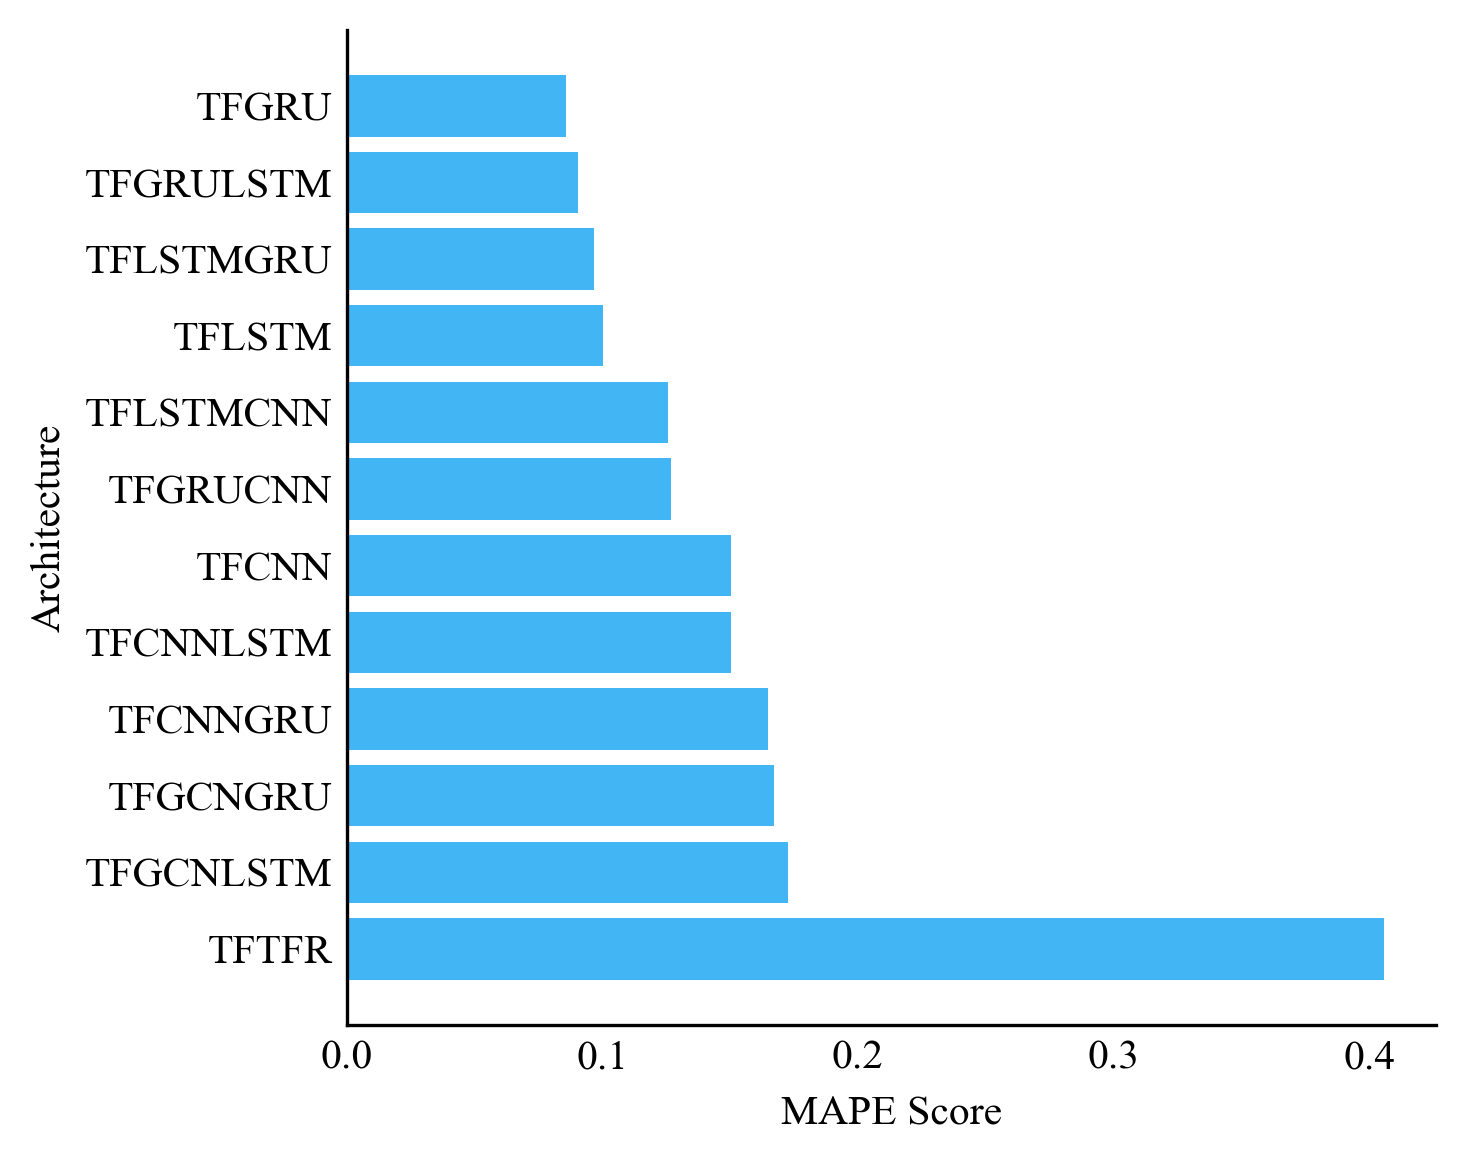

In [15]:
import matplotlib.pyplot as plt
plt.rcdefaults()
plt.rcParams.update({'font.family':'Times New Roman'})
fig = plt.figure(figsize =(5, 4))

df = df_averages_score.sort_values('mape', ascending=False)
print(df)
plt.barh(df['arch'], df['mape'], color='#42b6f5')
plt.xlabel('MAPE Score')
plt.ylabel('Architecture')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tick_params(axis='both', which='both', length=0, labelsize=10)
plt.tight_layout()

fig.set_dpi(300.0)
plt.show()

         arch           r2           mse        rmse      mape       acc  \
11      TFTFR -1585.140742  2.800556e+06  276.144750  0.405793  0.470011   
9   TFLSTMCNN   -86.166082  7.673181e+05  168.732846  0.125584  0.488119   
6    TFGRUCNN   -69.558903  5.935645e+05  159.563092  0.126963  0.496800   
4   TFGCNLSTM   -33.963919  1.641998e+06  271.666411  0.172409  0.505508   
3    TFGCNGRU   -74.756115  1.726645e+06  265.878911  0.167174  0.503114   
0       TFCNN  -122.121390  1.541039e+05  118.192779  0.150206  0.484141   
5       TFGRU   -39.426640  5.770210e+05  142.493339  0.085669  0.518305   
2   TFCNNLSTM   -65.500418  1.020739e+06  199.690174  0.150401  0.504224   
8      TFLSTM   -59.314644  7.626276e+05  153.928922  0.100326  0.517116   
7   TFGRULSTM   -64.930324  8.012565e+05  160.451339  0.090584  0.514721   
1    TFCNNGRU  -109.991538  8.815051e+05  188.805515  0.164609  0.510034   
10  TFLSTMGRU   -90.767576  7.731643e+05  158.065010  0.096678  0.523426   

          f

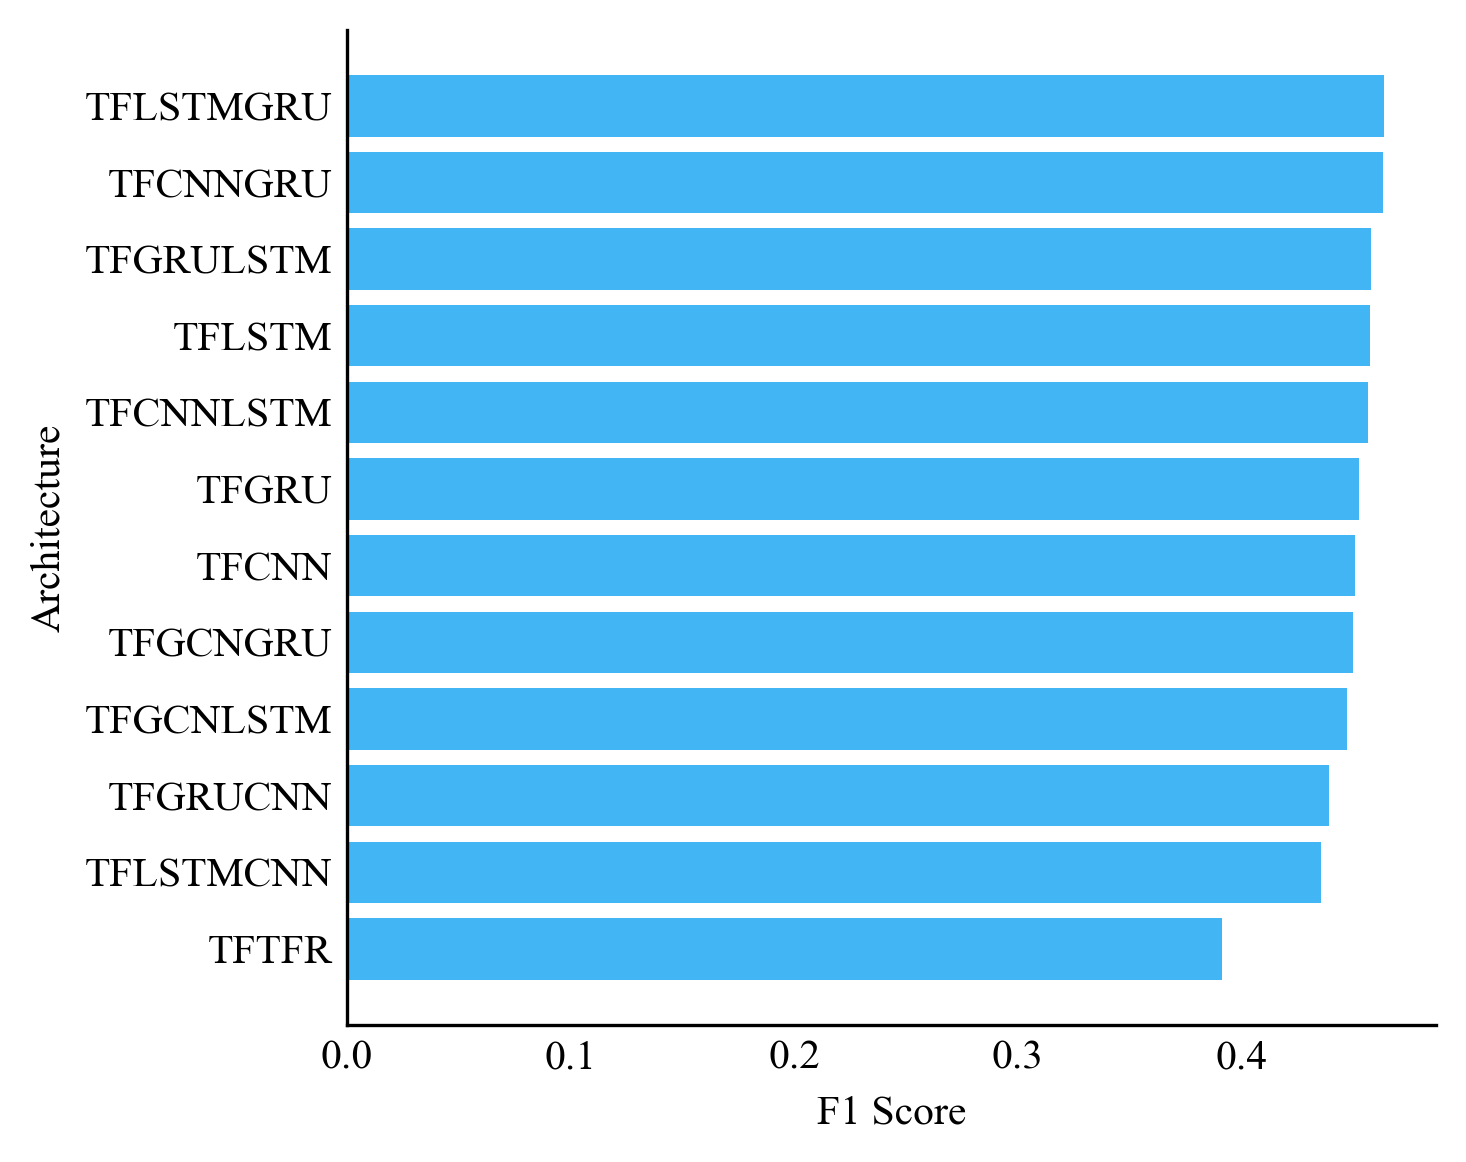

In [16]:
import matplotlib.pyplot as plt
plt.rcdefaults()
plt.rcParams.update({'font.family':'Times New Roman'})
fig = plt.figure(figsize =(5, 4))

df = df_averages_score.sort_values('f1', ascending=True)
print(df)
plt.barh(df['arch'], df['f1'], color='#42b6f5')
plt.xlabel('F1 Score')
plt.ylabel('Architecture')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tick_params(axis='both', which='both', length=0, labelsize=10)
plt.tight_layout()

fig.set_dpi(300.0)
plt.show()

In [17]:
df_result_sort = df_result.sort_values(by=['f1', 'acc', 'mape', 'rmse', 'mse', 'r2'], ascending=[False, False, True, True, True, False])
print(df_result_sort)
df_result_sort.to_excel('df_result_sort.xlsx', index=False)

      code                      sector  lookback       arch            r2  \
7494  SRIL  Barang Konsumen Non-Primer         5      TFGRU     -0.426293   
218   NANO      Barang Konsumen Primer         5   TFCNNGRU      0.132910   
7500  SRIL  Barang Konsumen Non-Primer         5     TFLSTM      0.294858   
7504  SRIL  Barang Konsumen Non-Primer         5  TFLSTMGRU      0.296663   
7490  SRIL  Barang Konsumen Non-Primer         5   TFCNNGRU     -0.439873   
...    ...                         ...       ...        ...           ...   
8247  TELE  Barang Konsumen Non-Primer        15  TFLSTMCNN     -0.088919   
5559  NASA  Barang Konsumen Non-Primer        15  TFLSTMCNN  -1152.711958   
8255  TELE  Barang Konsumen Non-Primer        15      TFTFR     -2.426928   
5567  NASA  Barang Konsumen Non-Primer        15      TFTFR  -7946.386686   
5566  NASA  Barang Konsumen Non-Primer         5      TFTFR -17149.952663   

               mse        rmse      mape       acc        f1  
7494     51.

         arch           r2           mse        rmse      mape       acc  \
11      TFTFR -1585.140742  2.800556e+06  276.144750  0.405793  0.470011   
0       TFCNN  -122.121390  1.541039e+05  118.192779  0.150206  0.484141   
1    TFCNNGRU  -109.991538  8.815051e+05  188.805515  0.164609  0.510034   
10  TFLSTMGRU   -90.767576  7.731643e+05  158.065010  0.096678  0.523426   
9   TFLSTMCNN   -86.166082  7.673181e+05  168.732846  0.125584  0.488119   
3    TFGCNGRU   -74.756115  1.726645e+06  265.878911  0.167174  0.503114   
6    TFGRUCNN   -69.558903  5.935645e+05  159.563092  0.126963  0.496800   
2   TFCNNLSTM   -65.500418  1.020739e+06  199.690174  0.150401  0.504224   
7   TFGRULSTM   -64.930324  8.012565e+05  160.451339  0.090584  0.514721   
8      TFLSTM   -59.314644  7.626276e+05  153.928922  0.100326  0.517116   
5       TFGRU   -39.426640  5.770210e+05  142.493339  0.085669  0.518305   
4   TFGCNLSTM   -33.963919  1.641998e+06  271.666411  0.172409  0.505508   

          f

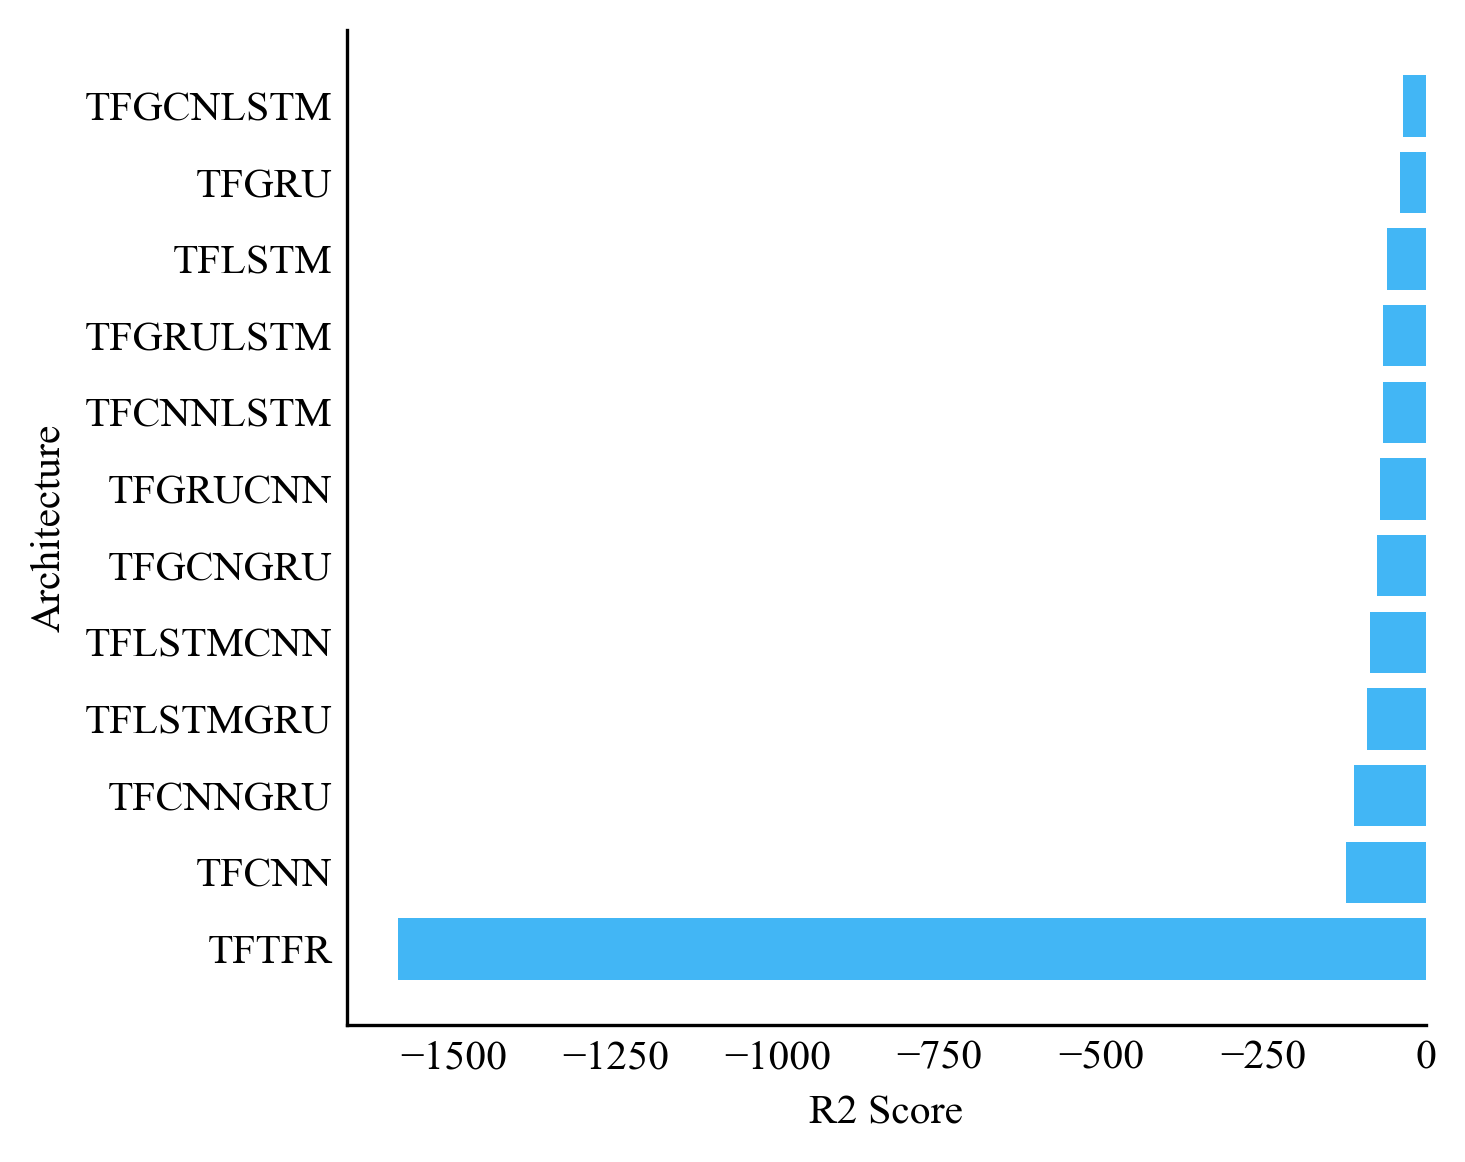

In [18]:
import matplotlib.pyplot as plt
plt.rcdefaults()
plt.rcParams.update({'font.family':'Times New Roman'})
fig = plt.figure(figsize =(5, 4))

df = df_averages_score.sort_values('r2', ascending=True)
print(df)
plt.barh(df['arch'], df['r2'], color='#42b6f5')
plt.xlabel('R2 Score')
plt.ylabel('Architecture')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tick_params(axis='both', which='both', length=0, labelsize=10)
plt.tight_layout()

fig.set_dpi(300.0)
plt.show()